# Exploratory Data Analysis (EDA) for Shopping Trends

This notebook explores the `shopping_trends.csv` dataset to uncover patterns, trends, and insights relevant for clustering and segmentation.

## EDA Process Outline

We will:
- Summarize the dataset structure
- Perform univariate and bivariate analysis
- Visualize key metrics and relationships
- Detect anomalies and outliers

## Step 1: Import Required Libraries

We use pandas for data manipulation, matplotlib and seaborn for visualization, and numpy for numerical operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Step 2: Load the Dataset

Read the CSV file and display the first few rows to understand its structure.

In [2]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Step 3: Set Plotting Style

Set default styles for plots to improve readability.

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Step 4: Summary Statistics

Display summary statistics for numerical columns to understand their central tendency and spread.

In [4]:
print("Summary Statistics for Numerical Columns:\n")
print(df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].describe())

Summary Statistics for Numerical Columns:

               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


## Step 5: Univariate Analysis - Numerical Columns

Visualize distributions and outliers for each numerical column using histograms and box plots.

In [5]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

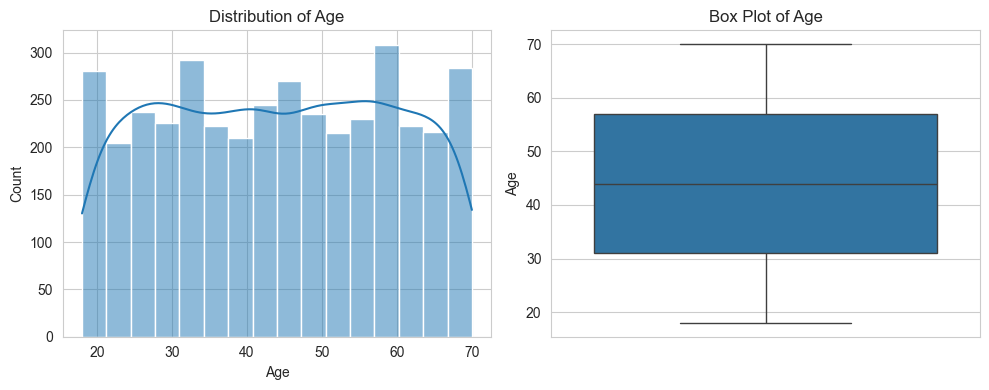

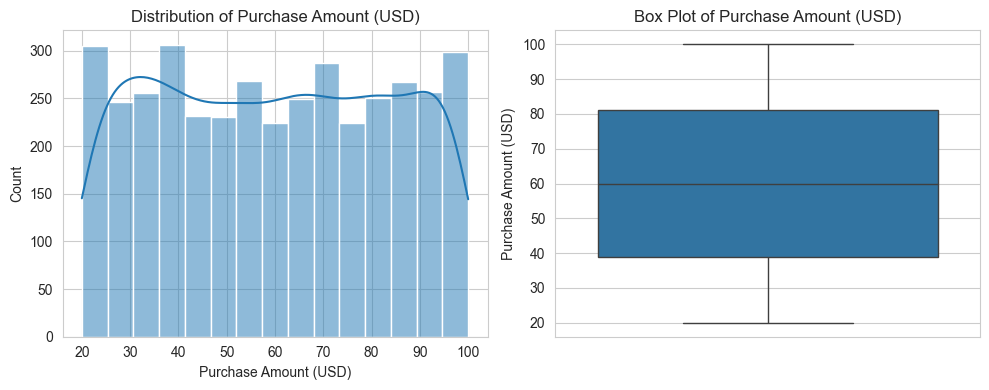

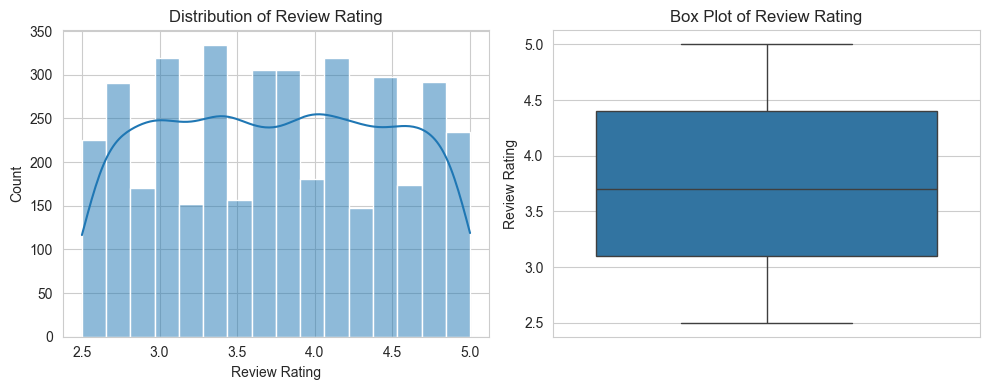

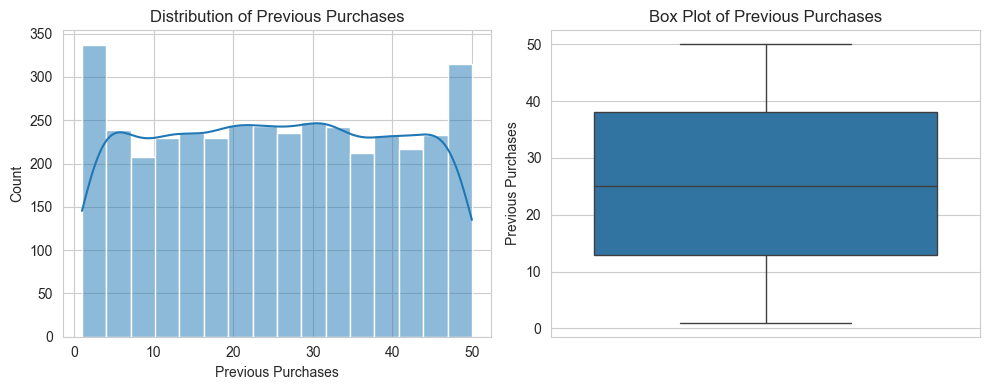

In [6]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

Histograms show the frequency distribution and possible skewness, while box plots highlight outliers and spread.

## Step 6: Univariate Analysis - Categorical Columns

Visualize the frequency of each category using bar plots.

In [7]:
categorical_cols = ['Gender', 'Category', 'Season', 'Subscription Status', 'Frequency of Purchases']

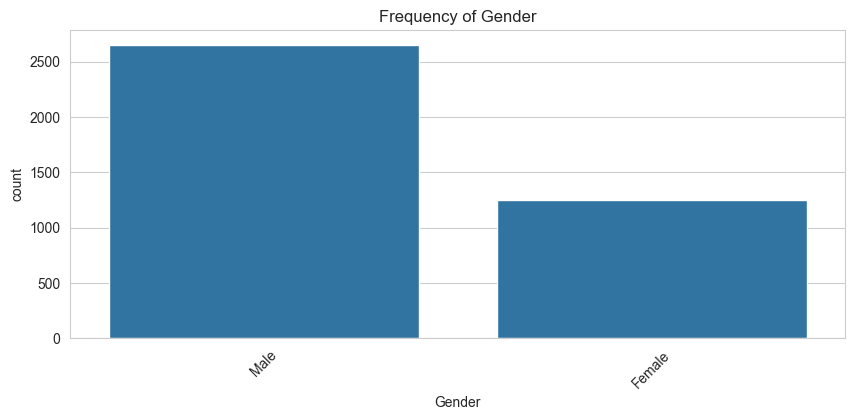

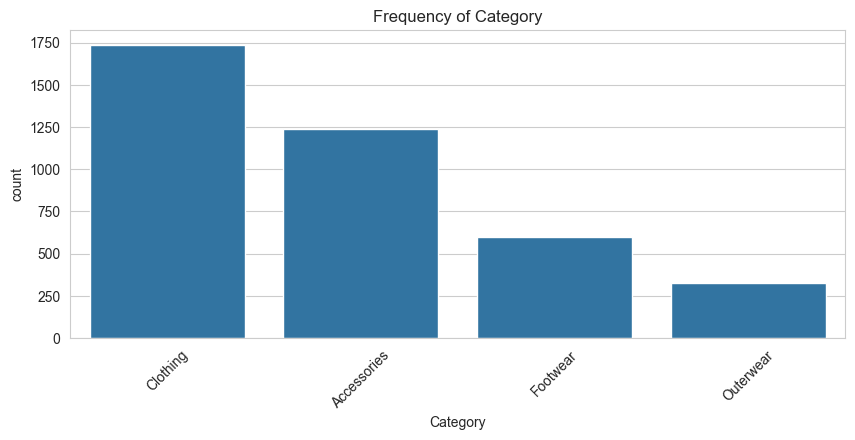

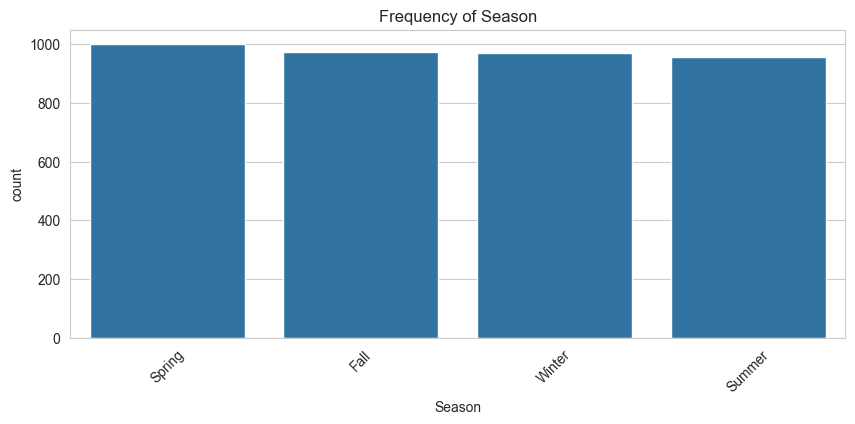

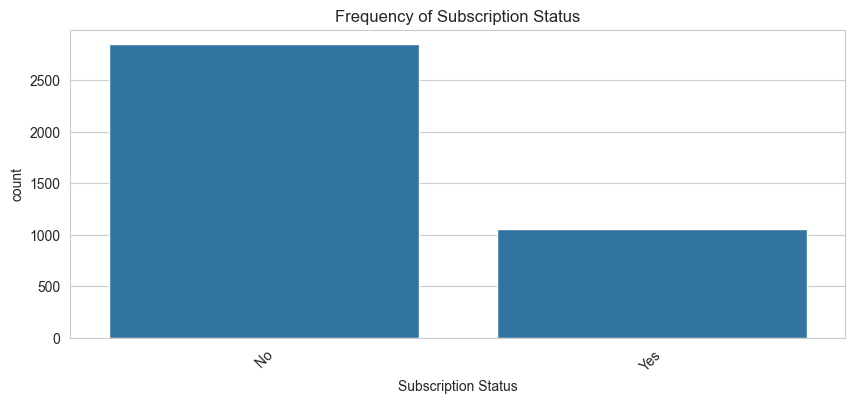

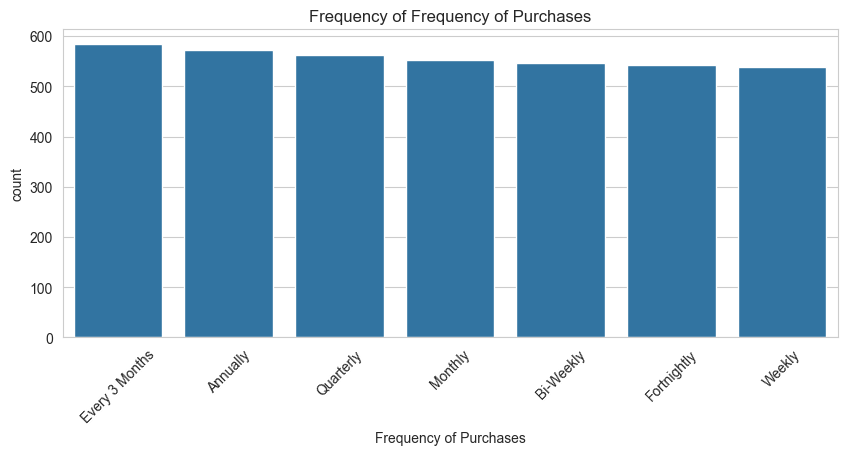

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

Bar plots help identify dominant categories and rare values in categorical columns.

## Step 7: Bivariate Analysis - Numerical vs. Numerical

Pair plots visualize relationships between numerical features and help detect correlations.

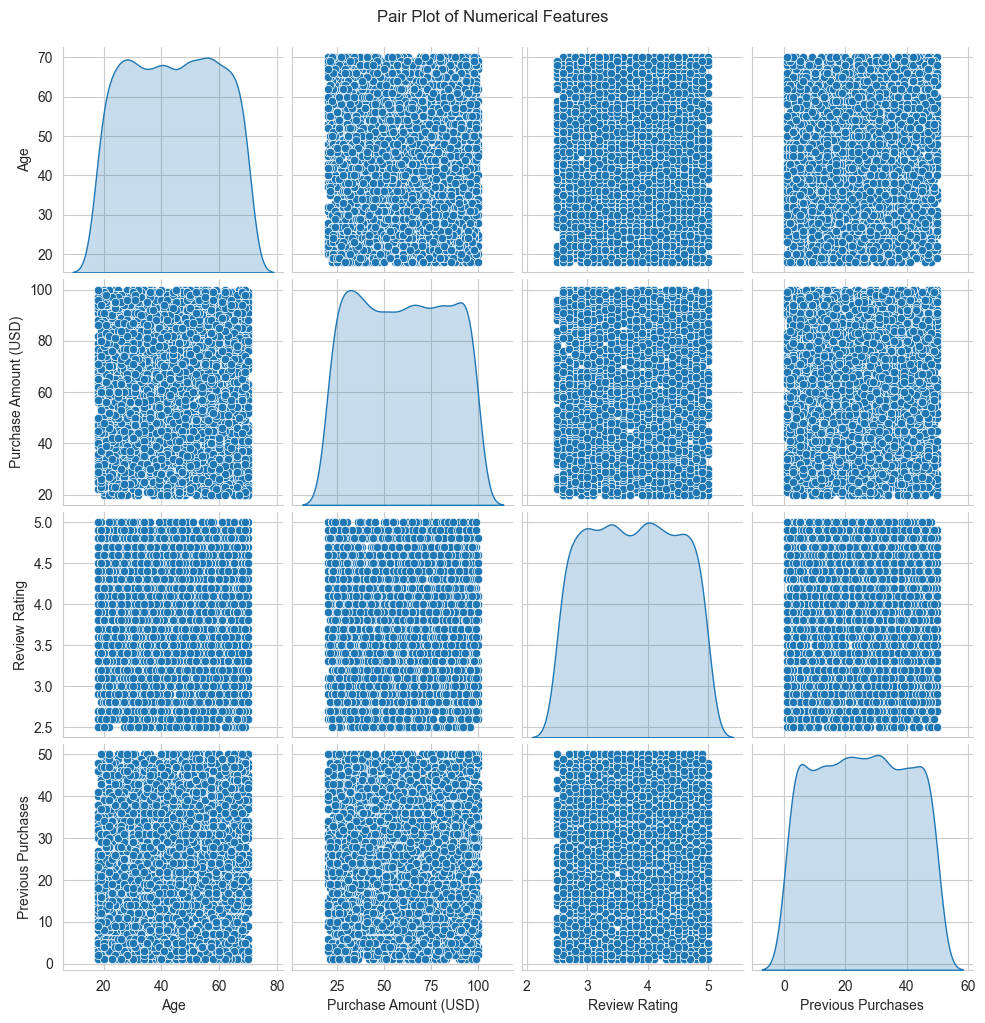

In [9]:
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

Pair plots show scatter plots for each pair of numerical features and KDE plots on the diagonal.

## Step 8: Correlation Heatmap for Numerical Columns

Correlation heatmaps help identify linear relationships and multicollinearity.

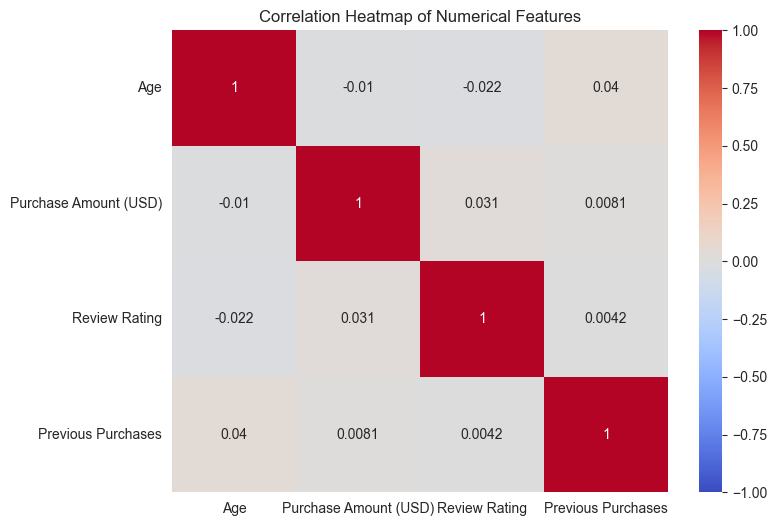

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Step 9: Bivariate Analysis - Categorical vs. Numerical

Box plots compare purchase behavior across categories and demographics.

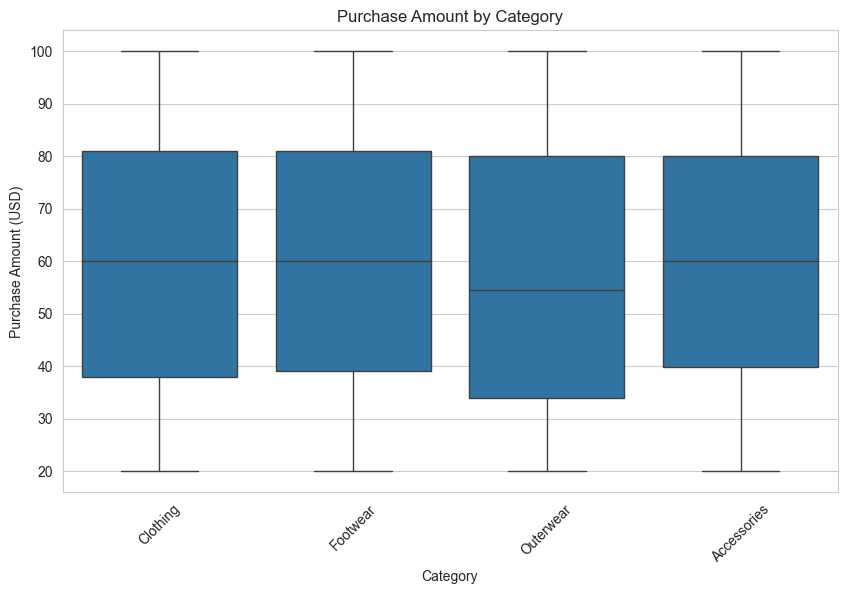

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

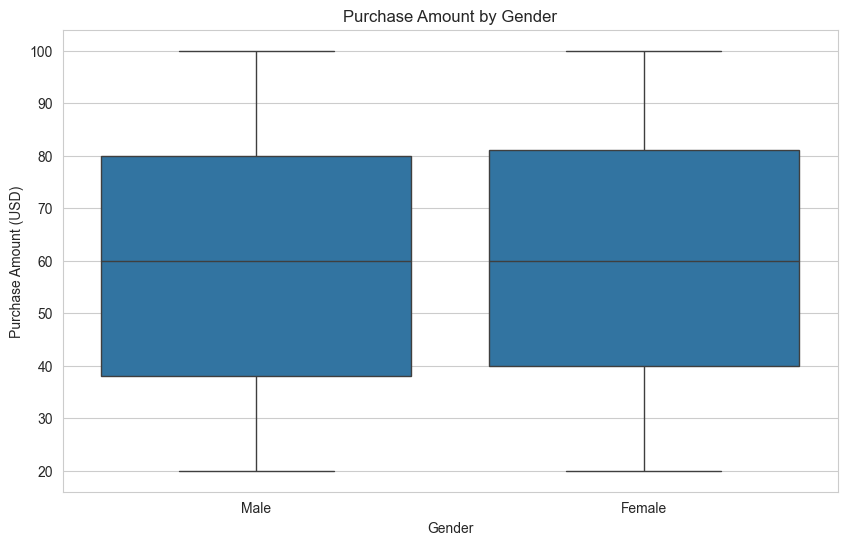

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Gender')
plt.show()

Box plots reveal differences in spending patterns across categories and genders.

## Step 10: Bivariate Analysis - Categorical vs. Categorical

Crosstab heatmaps show proportions of one category within another, useful for demographic analysis.

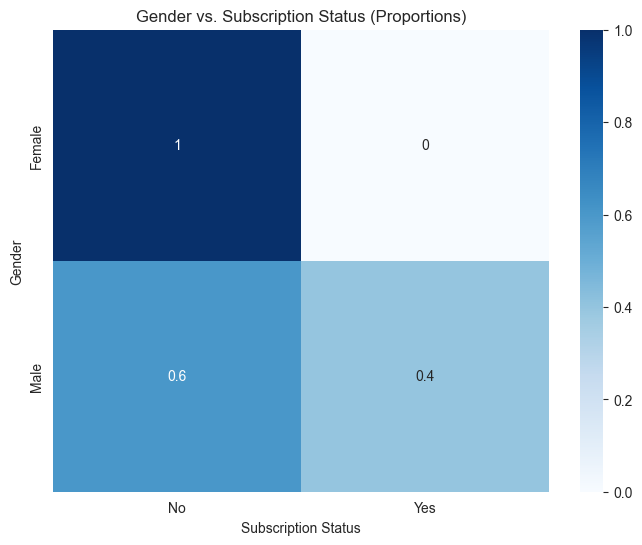

In [13]:
cross_tab = pd.crosstab(df['Gender'], df['Subscription Status'], normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Gender vs. Subscription Status (Proportions)')
plt.show()

Heatmaps help visualize the proportion of subscription status within each gender.

## Step 11: Geographic Analysis

Box plots by location help identify regional differences in purchase amounts.

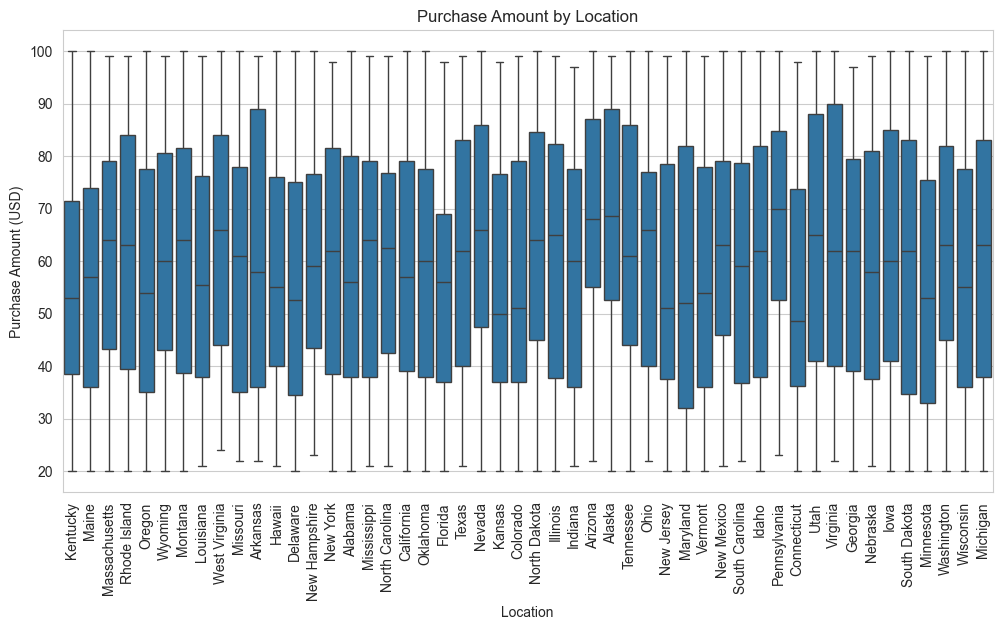

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Location')
plt.xticks(rotation=90)
plt.show()

This visualization can reveal regions with higher or lower spending.

## Step 12: Key Metrics for Segmentation

Calculate average purchase amounts by category and frequency of purchases to identify high-value segments.

In [15]:
print("\nAverage Purchase Amount by Category:\n")
print(df.groupby('Category')['Purchase Amount (USD)'].mean())
print("\nAverage Purchase Amount by Frequency of Purchases:\n")
print(df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean())


Average Purchase Amount by Category:

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

Average Purchase Amount by Frequency of Purchases:

Frequency of Purchases
Annually          60.173077
Bi-Weekly         60.694698
Every 3 Months    60.082192
Fortnightly       59.053506
Monthly           59.330922
Quarterly         59.984014
Weekly            58.972171
Name: Purchase Amount (USD), dtype: float64


These metrics help identify which categories and purchase frequencies are associated with higher spending.

## Step 13: Explanation of EDA Code

- **Summary Statistics:** Understand central tendencies and spread of numerical columns.
- **Univariate Analysis:** Visualize distributions and frequencies for individual columns.
- **Bivariate Analysis:** Explore relationships between pairs of columns.
- **Geographic Analysis:** Identify regional spending patterns.
- **Key Metrics:** Find high-value segments for clustering.

Expected insights include identifying customer demographics, purchase patterns, engagement trends, and geographic differences.